# Fitting Data With Python

This tutorial is to familiarize yourself with python, plotting data, and fitting data. 

## Plotting 

In [1]:
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt; import matplotlib.pyplot as plt

Loading large data sets into python is usually done using numpy arrays. Looking at our `Python plot-fit tutorial data.txt` data file, we see that the first line in the file is the header. There are four columns seperated by tabs and 21 rows of data. To load this data into a 4x21 data array, we use the following command.

```
data = np.loadtxt('Python plot-fit tutorial data.txt', skiprows = 1)
```

Once this data is loaded, we can define our x, and y arrays by splicing the larger data array,

```
x = data[:,0]; y1 = data[:,1]
```
these collect the zeroth and first collumn of the data array. This data was generated by means of the following function $f(x) = 0.4x^2$. To see just how good this fit is, we can can get practive defining a function for our amazing fit. 
```
def amazingfit(x):
	return 0.4*x**2
```
Plotting this data with it's generating function can be done with the following command

```
plt.plot(x, y1, '+', label = 'y1 data')
plt.plot(x,amazingfit(x), label = 'amazing fit')
```

To set the range on this graph we can use `np.amin(x)` to get the min value in the x array, and `np.amax(x)` to get its maximum. These can be used to set the limits on the x-axis

```
plt.xlim(np.amin(x), np.amax(x))
```

Generate labels for axes by using 
```
plt.ylabel('Current[mA]'); plt.xlabel('Voltage [V]')
```
and a legend using 
```
plt.legend()
```
The cell below implements all of this in python

Text(0.5, 0, 'Voltage [V]')

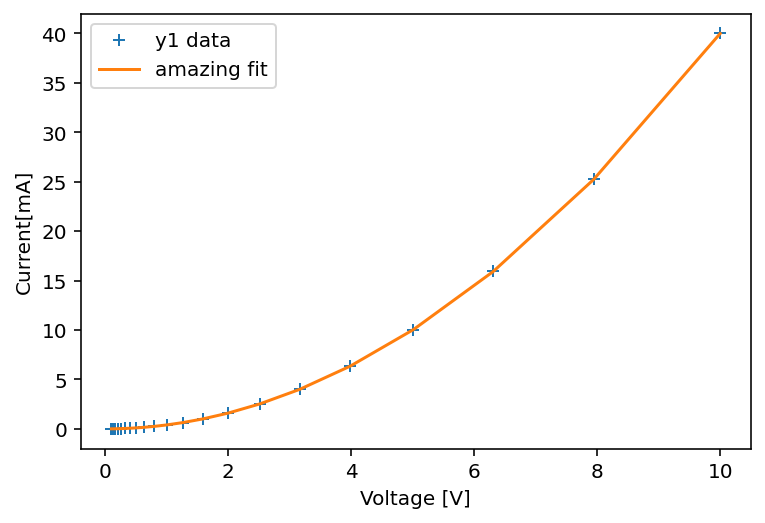

In [2]:
data = np.loadtxt('Python plot-fit tutorial data.txt', skiprows = 1)
x = data[:,0]; y1 = data[:,1]; y2 = data[:,2]; y3 = data[:,3] # you can use ; in the place of a new line to define multiple things

def amazingfit(x):
    return 0.4*x**2

plt.plot(x,y1, '+', label = 'y1 data'); plt.plot(x,amazingfit(x), label = 'amazing fit')
plt.legend()

plt.ylabel('Current[mA]'); plt.xlabel('Voltage [V]')

Now since we already know the generator for this data was a power law

$$
	f(x) = ax^{p},
$$

Taking the log of the function gives 

$$
	\log(f(x)) = \log(a)+p\log(x).
$$

So, plotting this data on a log log scale, we should get a linear trend with a slope of $2$. To get a log log scale plot in python we can simply use 
```
plt.loglog(x,y1, '+', label = 'y1 data')
plt.loglog(x, amazingfit(x), label = 'amazing fit')
```


Text(0.5, 0, 'Voltage [V]')

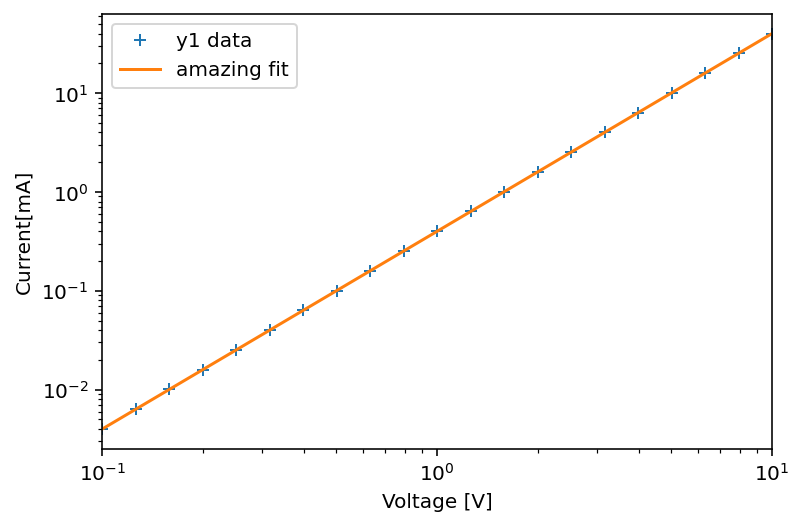

In [3]:
plt.loglog(x,y1, '+', label = 'y1 data'); plt.loglog(x, amazingfit(x), label = 'amazing fit')
plt.xlim(np.amin(x),np.amax(x)) # You can use np.amax() to find the max value in an array or np.amin() to find the min value
plt.legend()
plt.ylabel('Current[mA]'); plt.xlabel('Voltage [V]')

An alternate way of plotting this can be done by taking the log of the data itself, and then plotting it on a normal scale. In python this can be done using numpy's log function witch can take the log of each element in an array. For example, 
```
Lx = np.log(x); Ly1 = np.log(y1); Ly2 = np.log(y2); Ly3 = np.log(y3)
```
once this is done, the plots can be generated like before

Text(0.5, 0, 'Voltage [V]')

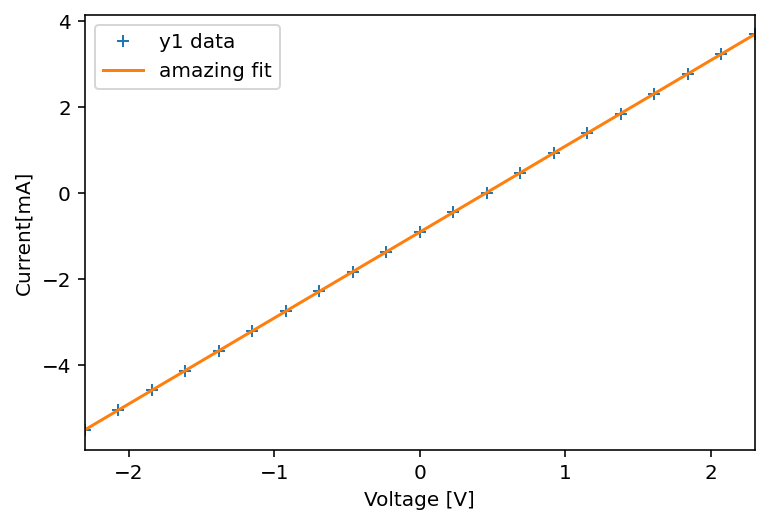

In [4]:
# Define a new log'd array
Lx = np.log(x); Ly1 = np.log(y1); Ly2 = np.log(y2); Ly3 = np.log(y3)

plt.plot(Lx,Ly1, '+', label = 'y1 data'); plt.plot(Lx,np.log(amazingfit(x)), label = 'amazing fit')
plt.xlim(np.amin(Lx),np.amax(Lx))
plt.legend()
plt.ylabel('Current[mA]'); plt.xlabel('Voltage [V]')

## Fitting

Consider a set of data points $\mu = \{(x_1,y_1), ..., (x_m,y_m)\}$, and a curve model function $f(x, \beta)$ witch depends on both $x$, and the parameters $\beta$. The goal of a fitting algorithm is to determine the optimal parameters $\beta$ such that this curve is the best representation of the data set given the constraints of the model function. Since maximization algorithms are inherently bad, we define a measure for how bad our fit is

$$
	S = \sum_{i = 0}^{i = m}(y_i-f(x_i,\beta)),
$$

and this is what we seek to minimize. To minimise this we consider taking the gradient of the sum of squares and setting it equal to zero. Since there could be $n$ parameters in $\beta$, one of such gradient components will be

$$
	\frac{\partial S}{\partial\beta_j} = s\sum_ir_i\frac{\partial r_i}{\partial \beta_j} = 0
$$




Python has two main fitting algorithms, `numpy.polyfit` and `scipy.optimize.curve_fit`, both implement the same type of minimization but do so in different ways. For this reason, `numpy.polyfit` works only for polynomials of arbitrary degree, whyle `scipy.optimize.curve_fit` works for any given function. Lets start with `scipy.optimize.curve_fit` where we need to define our test function. To import `scipy.optimize` functions as native functions, we do the following

```
from scipy.optimize import *
```

Define the power law class of test functions.

```
def power(x,a,p):
	return a*x**p
```

With this defined, we fit this function to the data with 

```
param, cov = sc.polyfit(power, x, y1)
```

this returns the parameters in an array labeld params, and the covariance matrix in an array labeled cov. To get get the uncertianties in the parameters, we can tale the square root of the covariance matrix

```
err = np.sqrt(np.diag(cov))
```

The fit parameters are a = 0.4+/-1.56e-08, and p = 2.0+/-1.803e-08


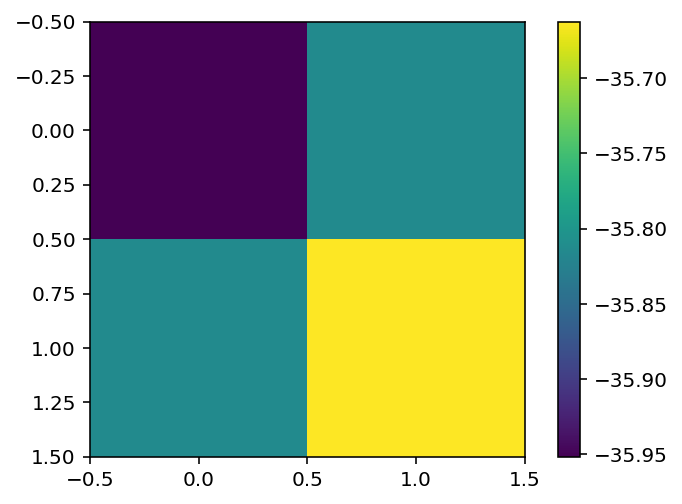

In [5]:
from scipy.optimize import *
def power(x,a,p):
    return a*x**p

param, cov = curve_fit(power,x,y1)
err = np.sqrt(np.diag(cov))

print(f'The fit parameters are a = {param[0]:.4}+/-{err[0]:.4}, and p = {param[1]:.4}+/-{err[1]:.4}')
plt.imshow(np.log(np.abs(cov))); plt.colorbar()

To plot this data, we can use pythons interpretive key word arguments, where it seeks to fill in the arguments of a function with elements of an array. The syntax for this is to use `*kwargs`.
```
plt.plot(x,power(x,*param), '--', label = f'{param[0]:.2}x^{param[1]:.2}')
```
Once again, we are using a python f-string to insert floating point numbers into the string. This is done in the following cell.

Text(0.5, 0, 'Voltage [V]')

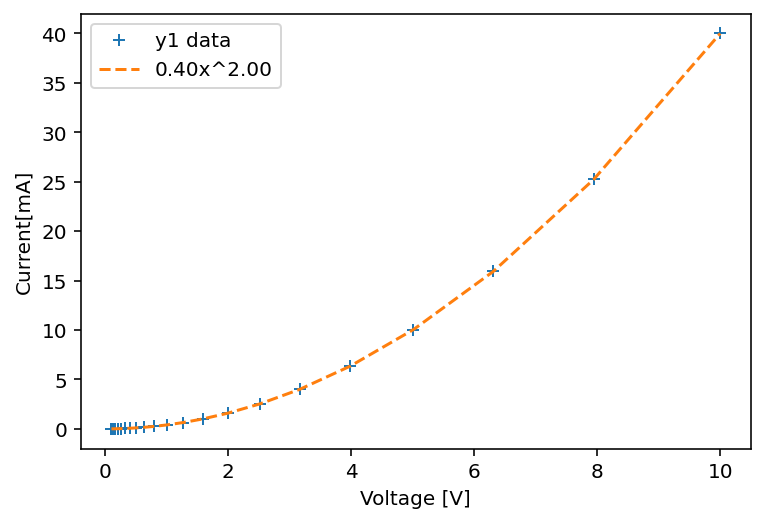

In [6]:
plt.plot(x,y1, '+', label = 'y1 data'); plt.plot(x,power(x,*param), '--', label = f'{param[0]:.2f}x^{param[1]:.2f}')
plt.legend()

plt.ylabel('Current[mA]'); plt.xlabel('Voltage [V]')

In [ ]:
param

We can also fit just a portion of our data. Start by defining a linear function 
```
def line(x, m, b):
	return m * x + b
```
Now to just fit the last half of our data by adding 
```
param, cov = curve_fit(line, x, y1, bounds=(5, 10))
```

Unfortunately, scipy does not have the ability to just give correlation constants $R^2$, but it can be found rather easily. The equation for a correlation can be found as 

$$
	R^2 = 1-\frac{SS_{res}}{SS_tot}
$$

where 

$$
	SS_{tot}= \sum_i(y_i-\bar{y})^2,\ SS_{res} = \sum_i(y_i-f_i)^2
$$

This can be done in python simply with the following function. Feel free to use it in your own scripts.
```
def correlation(f, xdata, ydata, params):
    residuals = ydata-f(xdata, *params)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((ydata-np.mean(ydata))**2)
    return 1-(ss_res / ss_tot)
```

In [7]:
def correlation(f, xdata, ydata, params):
    residuals = ydata-f(xdata, *params)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((ydata-np.mean(ydata))**2)
    return 1-(ss_res / ss_tot)

R2 = correlation(power, x, y1, param)
print(f'The correlation is {R2}')

The correlation is 0.9999999999999996


## A Noisy Data Set

Now, we can do the same thing with a noisy data set. As opposed to outlining all the things we can do instead this is just the python code. 

a = 0.39+/-0.02
p = 2.01+/-0.02
R^2 = 0.9993652


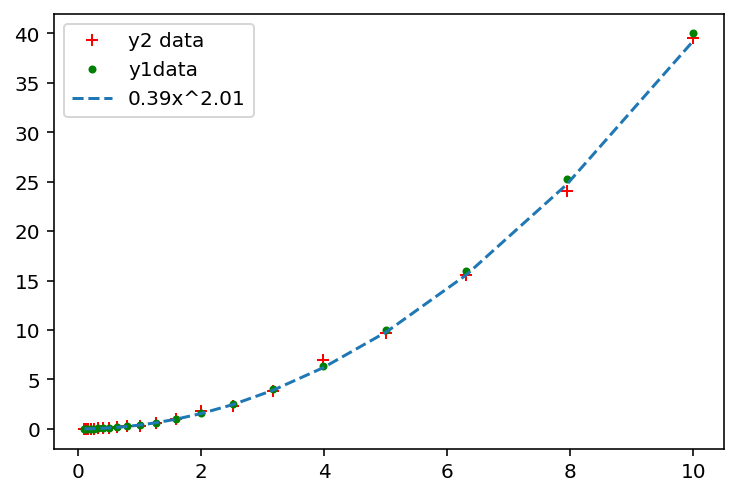

In [8]:
plt.plot(x,y2, 'r+', label = 'y2 data')
plt.plot(x,y1, 'g.', label = 'y1data')

param, cov = curve_fit(power,x, y2)
err = np.sqrt(np.diag(cov))
R2 = correlation(power, x, y2, param)

plt.plot(x,power(x,*param), '--', label = f'{param[0]:.2f}x^{param[1]:.2f}')
print(f'a = {param[0]:.2f}+/-{err[0]:.2f}\n'
      f'p = {param[1]:.2f}+/-{err[1]:.2f}\n'
      f'R^2 = {R2:.7f}')

plt.legend()

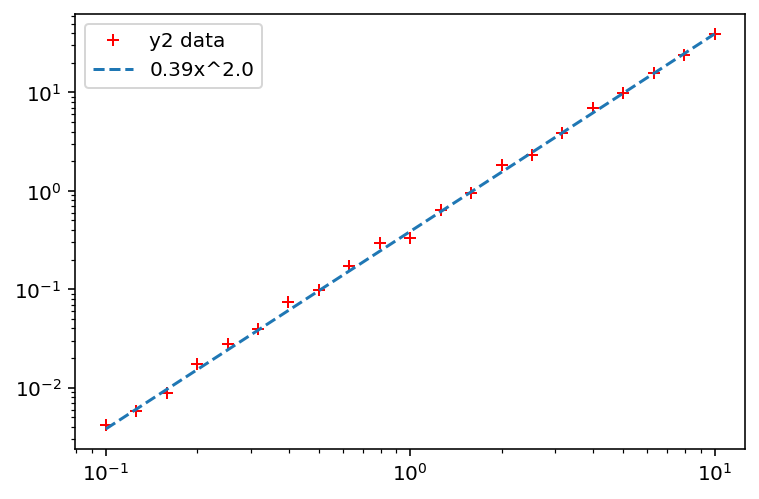

In [9]:
# Now on a log log plot this looks like 
plt.loglog(x,y2, 'r+', label = 'y2 data')
plt.loglog(x,power(x,*param), '--', label = f'{param[0]:.2}x^{param[1]:.2}')
plt.legend()

## Practice

In the following cells, do the following. 
- Plot the x and y data for the last collum in the `Python plot-fit tutorial data.txt` file on a linear scale and a log log scale. Include proper axis labels, a legend, and axis limits
- Write your own function to fit this data to
- Compute the fit parameters, correlation matrix, and standard errors.
- Plot the data allong with the fits on linear and log scales